# CS 560: Homework 9 Critique
### Eric Stevens

### Question 1

In [52]:
query1 = [['on','a','b','init'], 
          ['poss',['pickup','a','b'],'init'], 
          ['holding','a',['do',['pickup','a','b'],'init']],
          ['empty',['do',['putdown','a','t'],['do',['pickup','a','b'],'init']]]]

proveall(query=query1,kb=kb,indent="")

[[]]

### Question 1 Critique

I believe my answer is still valid here, it is just returning every possible combination of all of these things rather than inspecting them individually.

### Question 2

In [53]:
query2 = [['on','Block_on_table_in_inital_world','t','init'],
          ['poss','Action_possible_in_initail_world','init'],
          ['poss','Action_possible_after_pickup_a',['do',['pickup','a','b'],'init']]]

ans = proveall(query=query2, kb=kb, indent="")
ans

[['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'a', 'b'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 'b']],
 ['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'a', 'b'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 'c']],
 ['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'a', 'b'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 't']],
 ['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'c', 't'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 'b']],
 ['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'c', 't'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 'c']],
 ['Block_on_table_in_inital_world',
  'b',
  'Action_possible_in_initail_world',
  ['pickup', 'c', 't'],
  'Action_possible_after_pickup_a',
  ['putdown', 'a', 't']]

### Question 2 Critique

As in **Question 1**, I believe my answer is still valid here, it is just returning every possible combination of all of these things rather than inspecting them individually. Also I do not check to ensure that an object is a block when using the on predicate because I believe that this is assured by the KB. I think that, for both liberties that I took, the output of my implementation demonstrates that it is accurate. 

### Question 3



In [58]:
def forward_planner(kb):
    
    '''The frontier will begin with
    just the single element init.'''
    new_frontier = ['init']

    '''On each iteration (hint: while loop), 
    you first see if you can prove that goal
    is true of the current world.'''
    while len(new_frontier) > 0:
        
        #current world
        current_world = new_frontier[0]
        
        print("World:", current_world)
        
        '''If it is, then you can stop.'''
        ans = proveall([['goal',current_world]], kb)
        if len(ans) > 0: return True
        
        '''Otherwise, you need to find all actions that are
        possible (using proveall) in the current world. '''
        print("Goal is not true")
        possible_actions = proveall([['poss','Action',current_world]], kb)
        
        '''For each possible action, you can construct the new world as
        do(Action,World). This will give you all of the neighbors of the
        current world. You then add the neighbors to the frontier using a 
        breath-first search strategy.'''
        print("Neighbor worlds:")
        for action in possible_actions:
            new_frontier.append(['do',action[1],current_world])
            print("   ", ['do',action[1],current_world])
        new_frontier = new_frontier[1:]
        print("\n")
        
    # empty front
    print("No solution found")
    return False

forward_planner(kb)        
    


World: init
Goal is not true
Neighbor worlds:
    ['do', ['pickup', 'a', 'b'], 'init']
    ['do', ['pickup', 'c', 't'], 'init']


World: ['do', ['pickup', 'a', 'b'], 'init']
Goal is not true
Neighbor worlds:
    ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]
    ['do', ['putdown', 'a', 'c'], ['do', ['pickup', 'a', 'b'], 'init']]
    ['do', ['putdown', 'a', 't'], ['do', ['pickup', 'a', 'b'], 'init']]


World: ['do', ['pickup', 'c', 't'], 'init']
Goal is not true
Neighbor worlds:
    ['do', ['putdown', 'c', 'a'], ['do', ['pickup', 'c', 't'], 'init']]
    ['do', ['putdown', 'c', 't'], ['do', ['pickup', 'c', 't'], 'init']]


World: ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]
Goal is not true
Neighbor worlds:
    ['do', ['pickup', 'a', 'b'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]
    ['do', ['pickup', 'c', 't'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]


World: ['do', ['putdown', 'a', 'c']

Neighbor worlds:
    ['do', ['pickup', 'a', 't'], ['do', ['putdown', 'a', 't'], ['do', ['pickup', 'a', 'b'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]]
    ['do', ['pickup', 'b', 't'], ['do', ['putdown', 'a', 't'], ['do', ['pickup', 'a', 'b'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]]
    ['do', ['pickup', 'c', 't'], ['do', ['putdown', 'a', 't'], ['do', ['pickup', 'a', 'b'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]]


World: ['do', ['putdown', 'c', 'a'], ['do', ['pickup', 'c', 't'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]
Goal is not true
Neighbor worlds:
    ['do', ['pickup', 'c', 'a'], ['do', ['putdown', 'c', 'a'], ['do', ['pickup', 'c', 't'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]]


World: ['do', ['putdown', 'c', 't'], ['do', ['pickup', 'c', 't'], ['do', ['putdown', 'a', 'b'], ['do', ['pickup', 'a', 'b'], 'init']]]]
Goal is not true
Neig

True

### Question 4

We are mimicing Prolog here and therefore implement a negation as failure strategy, eliminating the need to delay.

### Question 5

In our implementation, the `proveall` function ensures that anything that we add to the frontier is possible in the state that it was resolved from. The frontire stores the entire history of resolutions.

### Question 6

The strips planner we previously implemented checks for preconditions by simply ensuring that the preconditions predicate list for a given action is a subset of the world that that action is intended to be taken from. This does not allow for the use of derived predicates because simply ensuring that the preconditions predicate list is a subset of a world does not take into account the predicates that could be implied implied by that world. 

### Question 7

Execute a top-down theorem prover to be called with the current world as the KB and preconditions of a desired action that are not contained within that world as the query. With this set up, preconditions could be derived on the fly.


### Question 8

Yes, in this case we can use derived predicates because the input to `proveall` takes the form of a `poss` function. The `proveall` function will attempt to resolve any preconditions using the knowledge base.


### Question 9

The primative `clear(A)` could be defined as a derivative in terms of the `on(B,A)` predicate like so:<br>
$clear(A) \longleftarrow \lnot on(B,A)$

`empty` could be defined using the negation of `holding(A)` like so:<br>
$empty \longleftarrow \lnot holding(A)$

### Question 9 

I forgot to ensure that $\lnot holding(A)$ was part of the $clear(A)$ derivation.

### Question 10

I can only spot a single threat in this planner. In the two moves that are in parallel with causal links to the finish state, the one on the left has an add list that includes `!clear(m)` where the one on the right has a precondition of `clear(m)`. This is a clobber that can be resolved by having the action on the left follow the one on the right. By colapsing these actions from parallel to series in this way we have removed the threat and have a single, linearized solution.

### Question 11

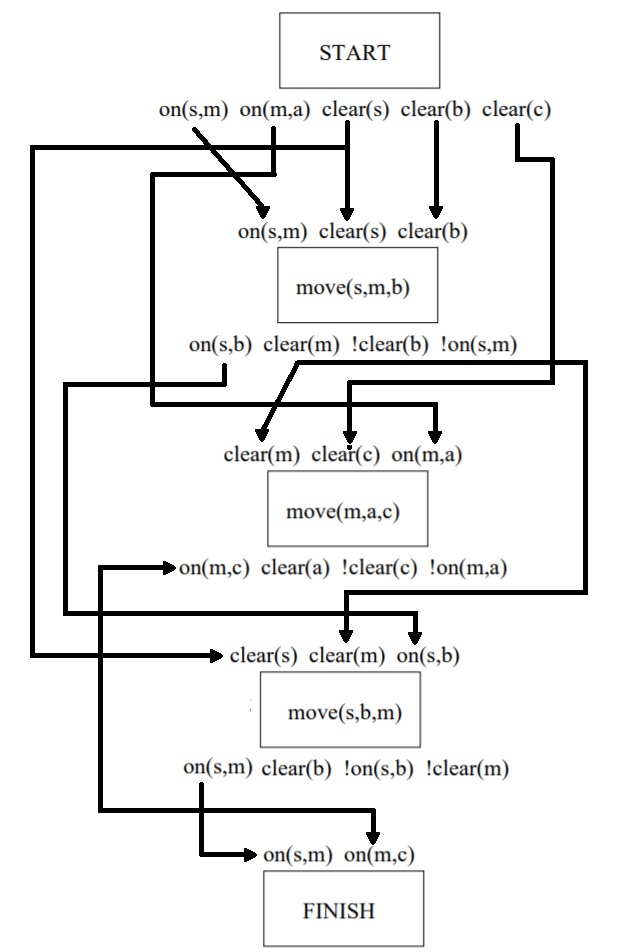

### Question 12

```
subset([],_). 
subset([Sub_head|Sub_rest],Set) :-
        member(Sub_head,Set),
        subset(Sub_rest,Set).
    
% Told use of subtract was ok in Slack
remove(Sub,Set,Rest) :-
        subset(Sub,Set),    
        subtract(Set, Sub, Rest).
```

### Question 12 Critique

Just a reminder: I was told by you on slack that I was allowed to use `subtract` to implement `remove`. I believe my solution acomplishes the task.

### Question 13

```
neighbor([Plan,World],[[NewPlan],NewWorld]) :-
        action(NextAction,Pre,Add,Del),
        subset(Pre,World),
        remove(Del,World,NewWorldMinus),
        append(NewWorldMinus,Add,NewWorld),
        append(Plan,NextAction,NewPlan).
```

### Question 13 Critique

For this problem and the following ones I believe I have the concepts down for what needs to be acomplished, but my lack of firmiliarity with Prlogs data structures and syntax impeads me, often making it difficult to come to an *elegant* solution. I believe I do stumble through and acomplish the goals for all of the questions in this section.

### Question 14

```
plan([[CurrentPlan,CurrentWorld]|_]) :-
        goal(Goal),
        subset(Goal,CurrentWorld),
        write("\n Goal: "),
        write(Goal),
        write("\n CurrentWorld: "),
        write(CurrentWorld),
        write("\n CurrentPlan: "),
        write(CurrentPlan),
        !. % this cut will prevent infinite combos

plan([First|Frontier]) :-
        findall(New,neighbor(First,New),Neighbors),
        append(Frontier,Neighbors, Temp),
        plan(Temp).


test() :-
        initial(Initial),
        plan([[[],Initial]]
```        

**Output:**
```        
Goal: [on(c,b),on(b,a),on(a,t)]
CurrentWorld: [block(a),block(b),block(c),table(t),on(a,t),on(b,a),on(c,b),clear(c),empty]
CurrentPlan: [[[[[[pickup(a,b)|putdown(a,t)]|pickup(b,c)]|putdown(b,a)]|pickup(c,t)]|putdown(c,b)]]
true.
```

### Question 14 Critique

Once again, here my understanding of Prolog syntax and data structures makes it difficult to come to an elegant output. None the less, I believe by examining my output you will see that, although ugly, the derived plan is accurate.